In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\PROFESSIONAL\AI\Data Science\Data Analysis\Analysis on olympic\dataset\Data_set\Athlete_events.csv')
region_df=pd.read_csv(r"D:\PROFESSIONAL\AI\Data Science\Data Analysis\Analysis on olympic\dataset\Data_set\noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df=df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df=df.merge(region_df,on="NOC",how='left')

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [9]:
df.shape

(222552, 17)

In [10]:
df['region'].unique().shape

(206,)

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df=pd.concat([df,pd.get_dummies(df['Medal']).astype('int8')],axis=1)

In [16]:
df.shape

(221167, 20)

In [17]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [18]:
df[(df['NOC']=='PAK') & df['Gold']==1].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
455,297,Lala Abdul Rashid,M,38.0,169.0,91.0,Pakistan,PAK,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN,0,1,0
2168,1389,Muhammad Ashfaq Ahmed,M,21.0,162.0,62.0,Pakistan,PAK,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN,0,1,0
2170,1391,Bashir Ahmed,M,25.0,171.0,67.0,Pakistan,PAK,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN,0,1,0
2179,1400,Ishtiaq Ahmed,M,21.0,170.0,62.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN,0,1,0
2192,1408,Mushtaq Ahmed,M,28.0,170.0,70.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN,0,1,0


In [19]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

In [72]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

(105636, 20)

In [21]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [22]:
medal_tally[medal_tally['Year']==1996]

KeyError: 'Year'

In [80]:
medal_tally


,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [83]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

KeyError: 'region'

In [88]:
years=df['Year'].unique().tolist()

In [89]:
years.sort()

In [91]:
years.insert(0,'Overall')

In [92]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [93]:
country=np.unique(df['region'].dropna().values).tolist()

In [94]:
country.sort()

In [95]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [96]:
country.insert(0,'Overall')

In [97]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [163]:
def fetch_medal_tally(year,country):
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df = medal_tally
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df = medal_tally[medal_tally['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df = medal_tally[medal_tally['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df = medal_tally[(medal_tally['Year']==int(year)) & (medal_tally['region']==country)]
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:    
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']
        
    print(x) 

In [166]:
fetch_medal_tally(year='Overall',country='Pakistan')

    Year  Gold  Silver  Bronze  total
0   1948     0       0       0      0
1   1952     0       0       0      0
2   1956     0       1       0      1
3   1960     1       0       1      2
4   1964     0       1       0      1
5   1968     1       0       0      1
6   1972     0       1       0      1
7   1976     0       0       1      1
8   1984     1       0       0      1
9   1988     0       0       1      1
10  1992     0       0       1      1
11  1996     0       0       0      0
12  2000     0       0       0      0
13  2004     0       0       0      0
14  2008     0       0       0      0
15  2012     0       0       0      0
16  2016     0       0       0      0


In [168]:
fetch_medal_tally(year=2014,country='USA')

Empty DataFrame
Columns: [Year, Gold, Silver, Bronze, total]
Index: []


In [23]:
df['Year'].unique().shape[0]-1

(29,)

In [26]:
df['City'].unique()[0]

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [ ]:
df['Sport'].unique()[0]

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [28]:
df['Event'].unique().shape[0]

(651,)

In [29]:
df['Name'].unique().shape[0]

(116122,)

In [30]:
df['region'].unique().shape[0]

(206,)

In [40]:
nations_over_time

,Year,count
0,1896,12
1,1904,14
2,1906,20
3,1908,22
4,1912,29
5,1920,29
6,1900,31
7,1924,45
8,1928,46
9,1932,47


In [76]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_values(ascending=True).reset_index()

In [81]:
x

,Year,count
0,1896,43
1,1906,74
2,1900,90
3,1904,95
4,1912,107
5,1908,109
6,1928,122
7,1932,131
8,1924,131
9,1952,149


In [41]:
nations_over_time.rename(columns={'Year':'Edition','count':'No of Countries'},inplace=True)

In [77]:
nations_over_time

,Year,count
0,1896,12
1,1904,14
2,1906,20
3,1908,22
4,1912,29
5,1920,29
6,1900,31
7,1924,45
8,1928,46
9,1932,47


In [44]:
import plotly.express as px

In [51]:
nations_over_time

,Edition,No of Countries
0,1896,12
6,1900,31
1,1904,14
2,1906,20
3,1908,22
4,1912,29
5,1920,29
7,1924,45
8,1928,46
9,1932,47


In [50]:
fig = px.line(nations_over_time, x= "Edition",y="No of Countries")
fig.show()

In [62]:
event_over_time = df.drop_duplicates(subset=['Year','Event'])['Year'].value_counts().reset_index()
event_over_time.rename(columns={'Year':'Edition','count':'No of Event'},inplace=True)
event_over_time = event_over_time.sort_values(by="Edition")


In [63]:
event_over_time

,Edition,No of Event
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [99]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

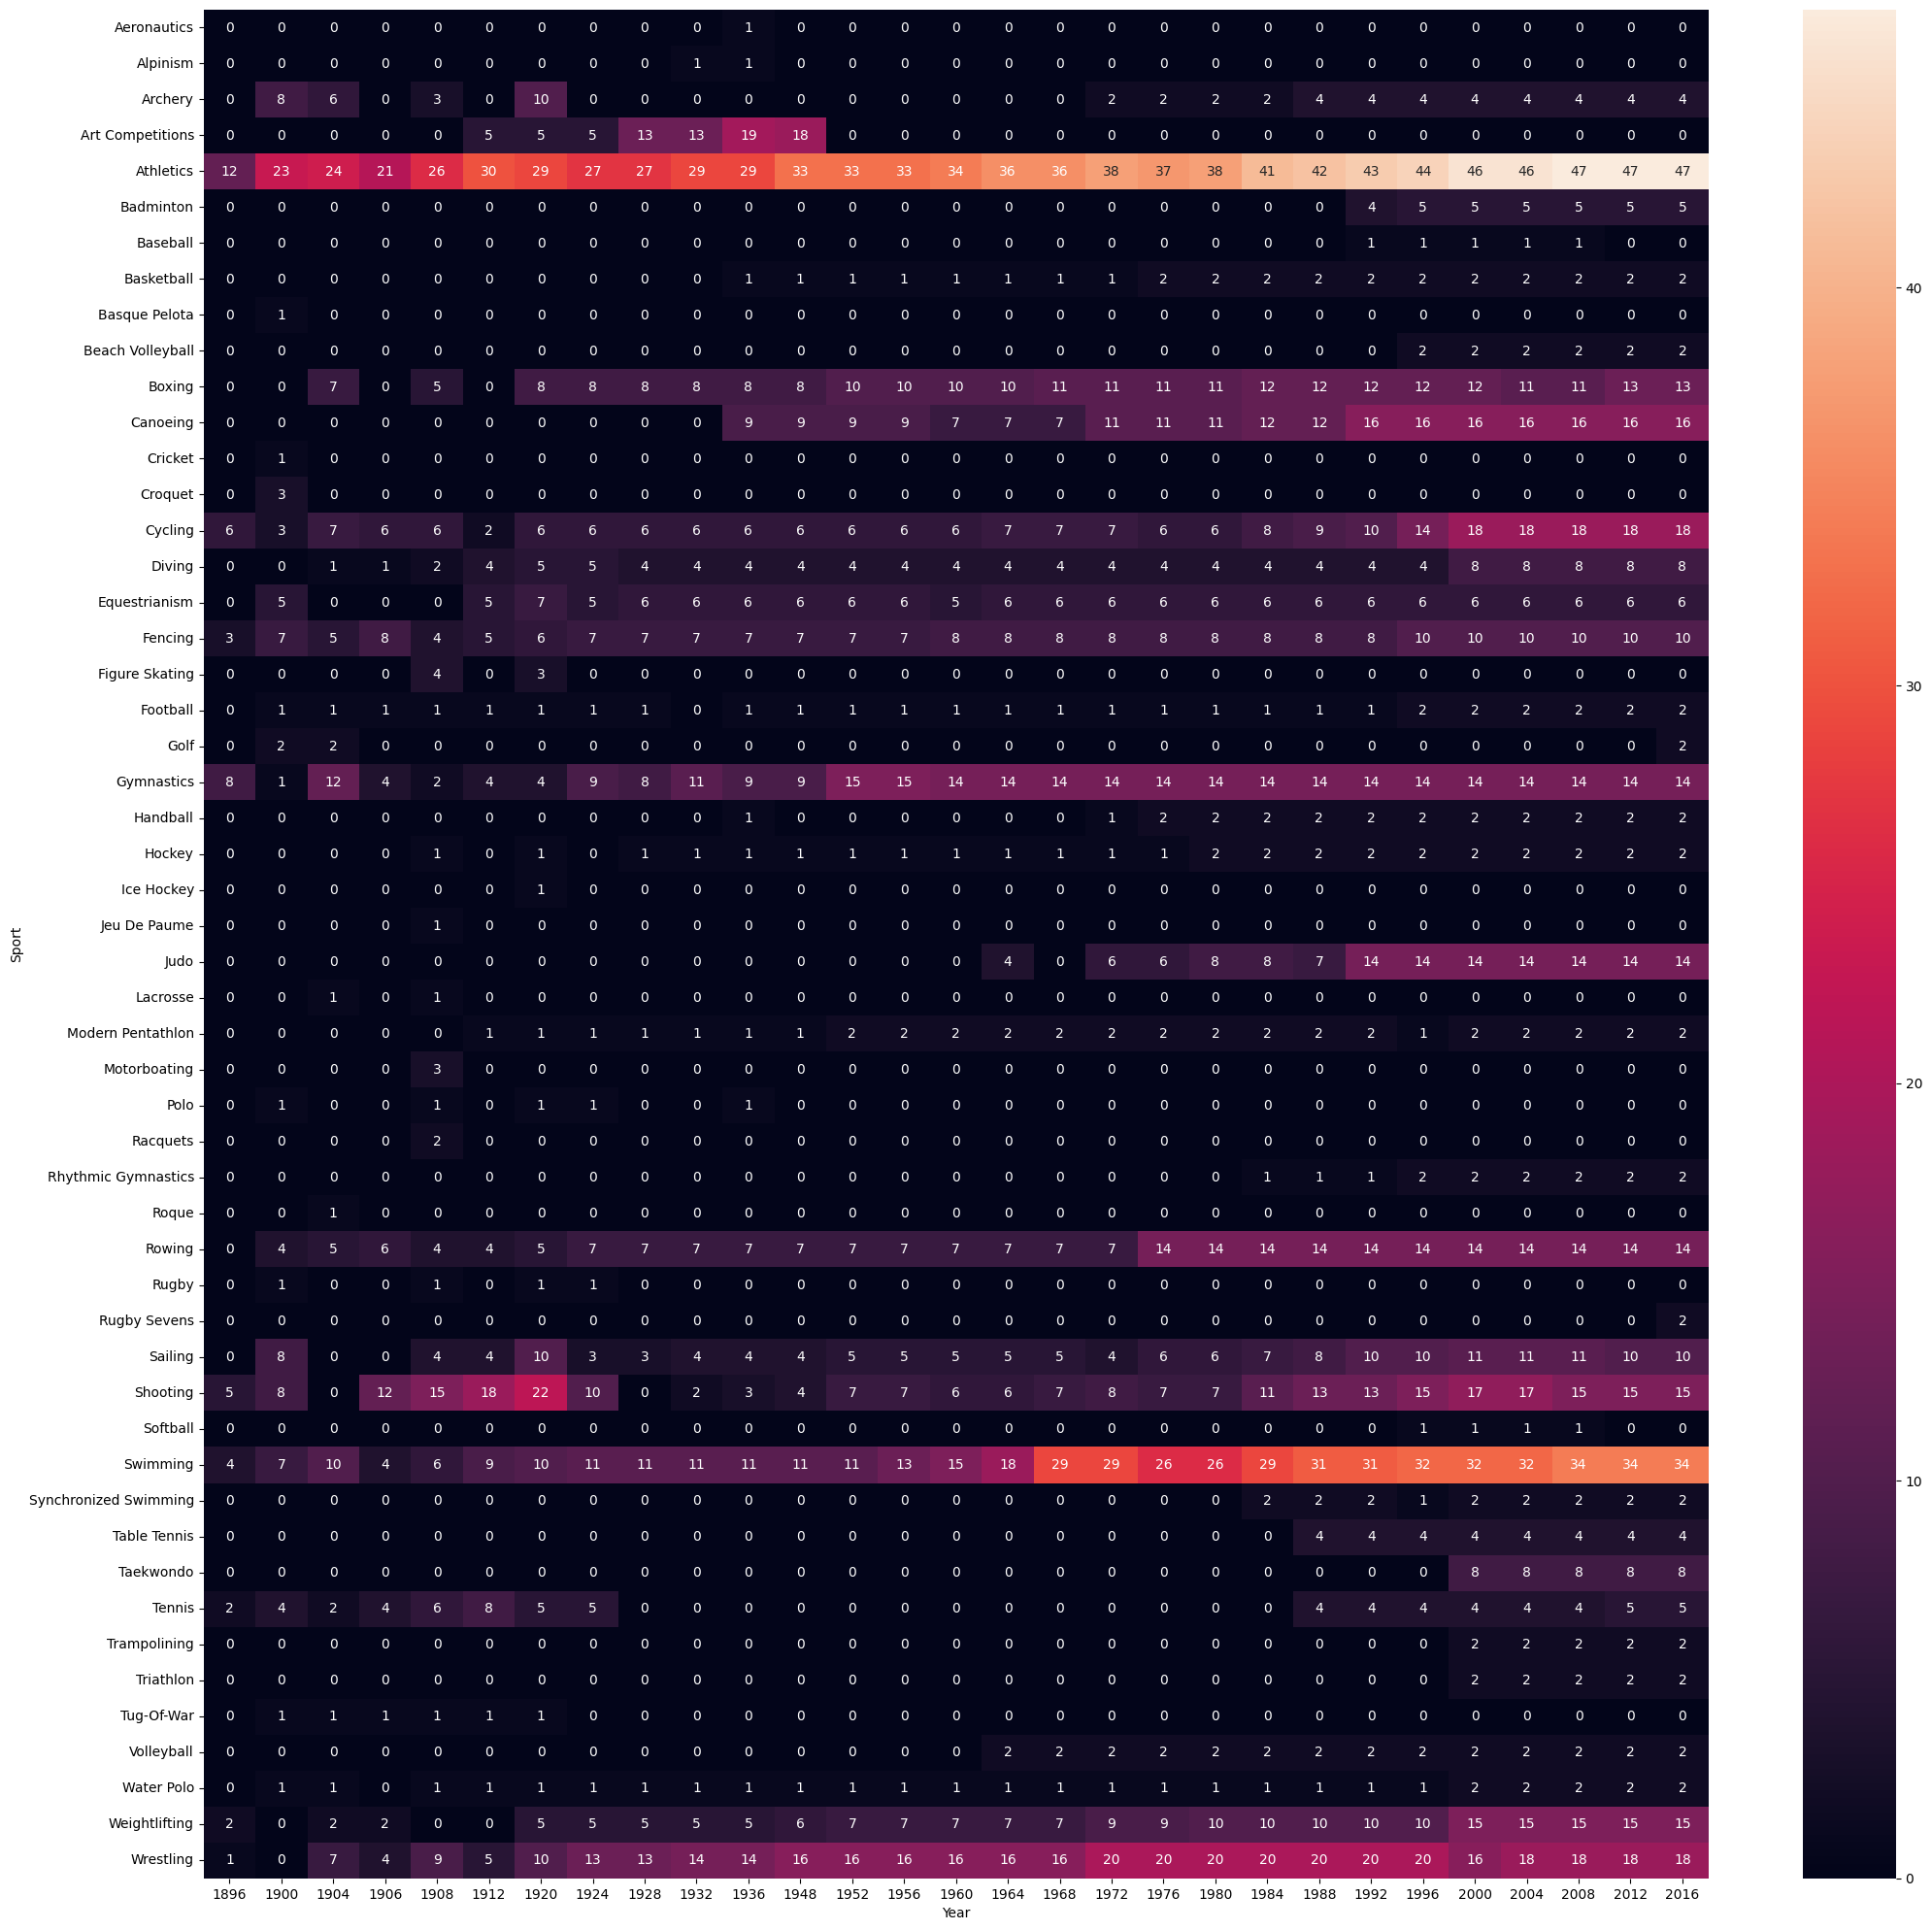

In [100]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year', values= 'Event', aggfunc='count').fillna(0).astype('int'),annot=True)


In [160]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates(['Name'])
    x.rename(columns={'count':'Medals'},inplace=True)
    return x    

In [161]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [166]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
temp_df=temp_df[temp_df['region']=='USA']
final_df=temp_df.groupby('Year').count()['Medal'].reset_index()

C:\Users\tesla\AppData\Local\Temp\ipykernel_19756\1212395139.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
final_df

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [169]:
fig = px.line(final_df, x= "Year",y="Medal")
fig.show()

In [184]:
country_list =df['region'].dropna().unique().tolist()
# country_list = [item for item in country_list if isinstance(item, str)]
country_list.sort() 


In [186]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
final_df=temp_df[temp_df['region']=='USA']
# final_df=temp_df.groupby('Year').count()['Medal'].reset_index()

C:\Users\tesla\AppData\Local\Temp\ipykernel_19756\2067198191.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

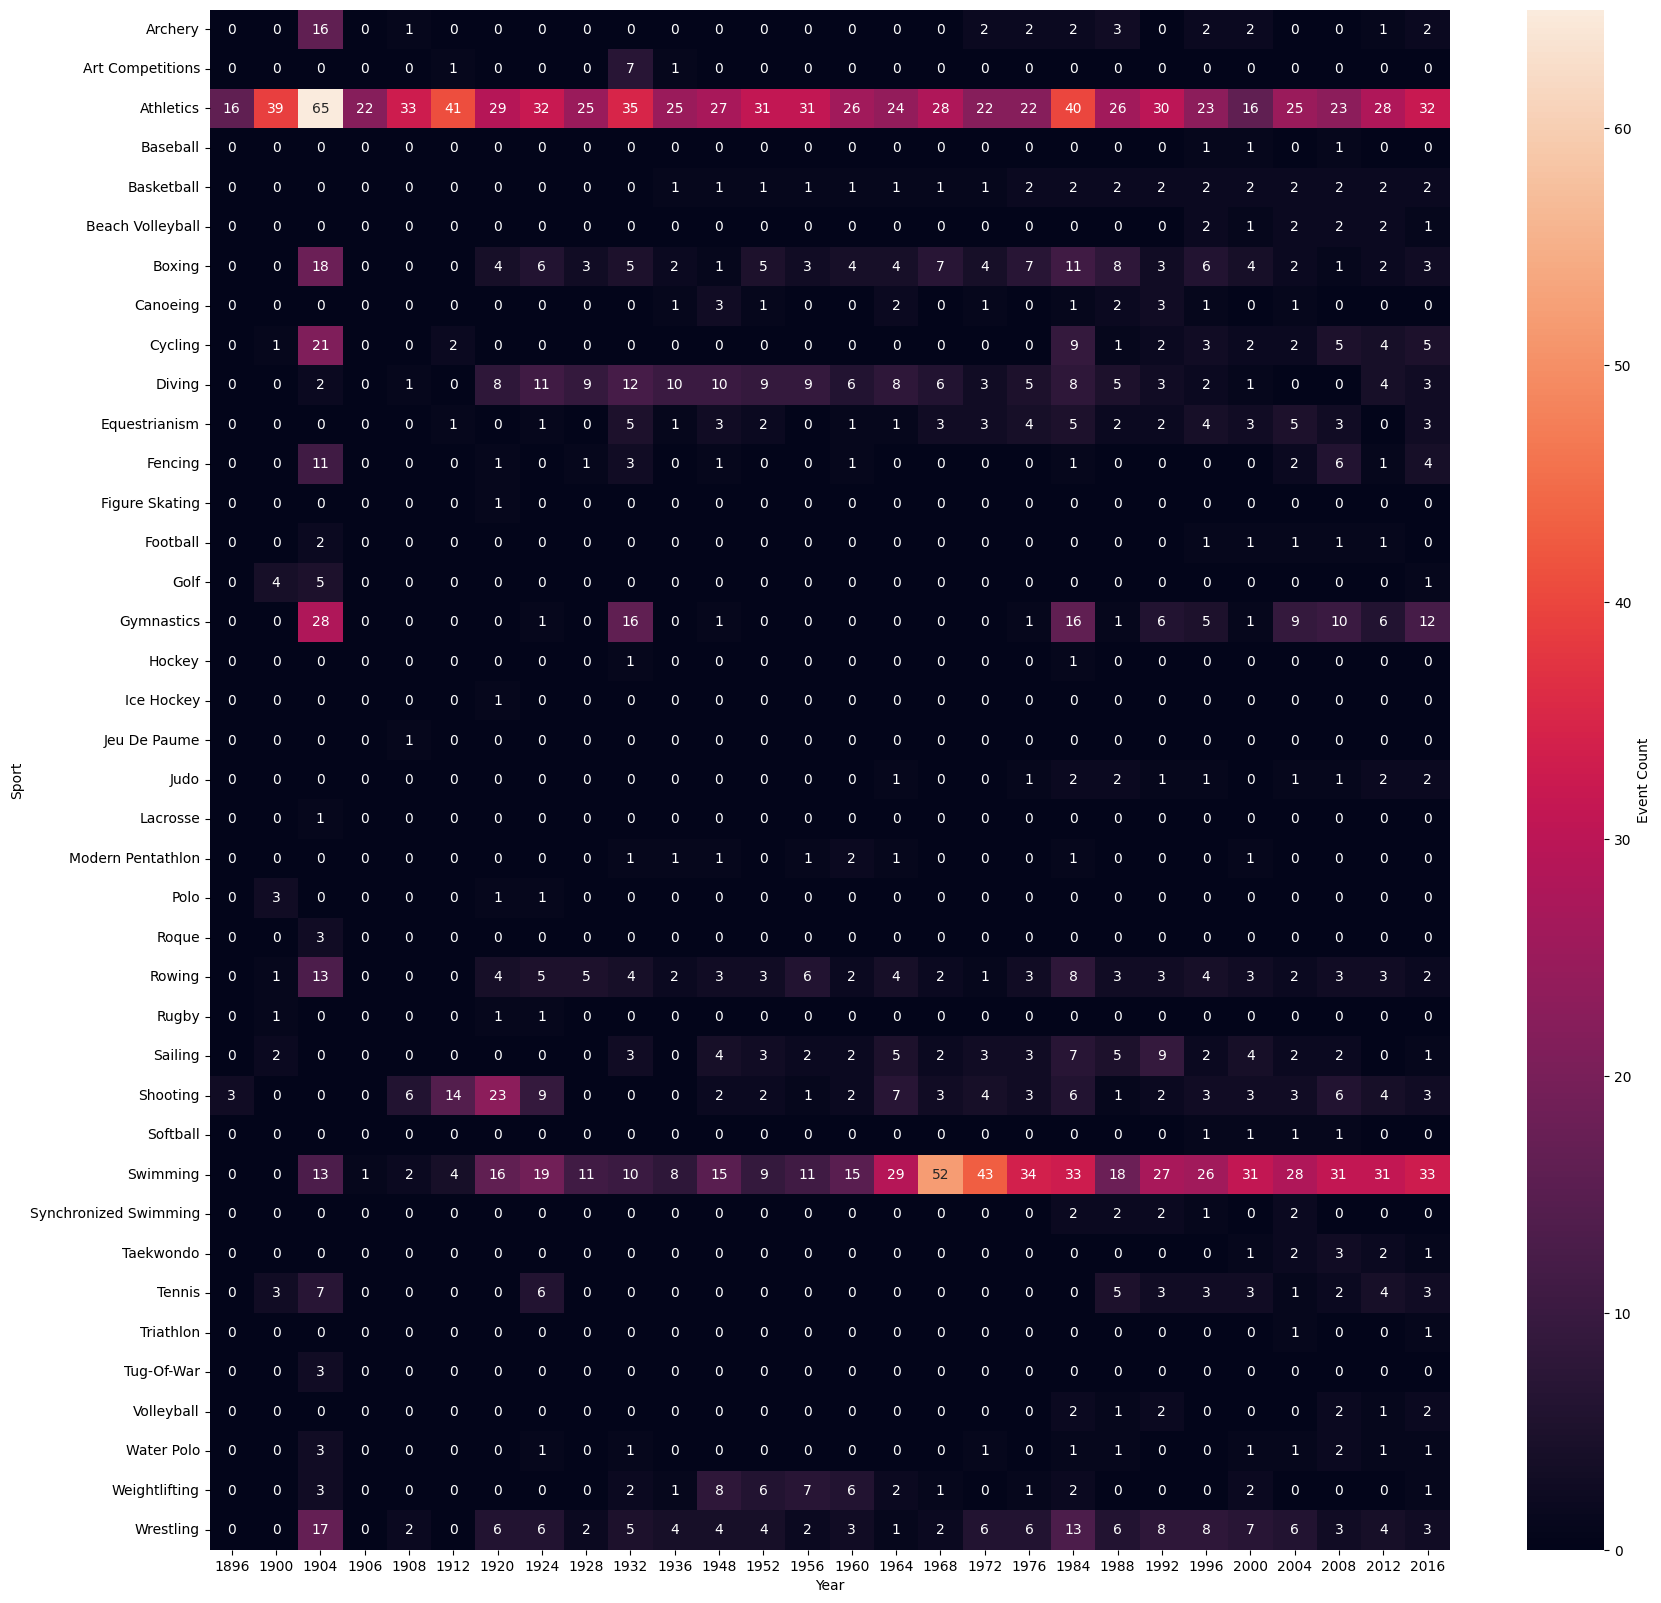

In [191]:
pivot_data = final_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int)
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_data,  cbar_kws={'label': 'Event Count'},annot=True)


In [189]:
pivot_data

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1976,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Archery,NaN,NaN,16.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,NaN,2.0,2.0,NaN,NaN,1.0,2.0
Art Competitions,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Athletics,16.0,39.0,65.0,22.0,33.0,41.0,29.0,32.0,25.0,35.0,...,22.0,40.0,26.0,30.0,23.0,16.0,25.0,23.0,28.0,32.0
Baseball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
Basketball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Beach Volleyball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0
Boxing,NaN,NaN,18.0,NaN,NaN,NaN,4.0,6.0,3.0,5.0,...,7.0,11.0,8.0,3.0,6.0,4.0,2.0,1.0,2.0,3.0
Canoeing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN
Cycling,NaN,1.0,21.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,9.0,1.0,2.0,3.0,2.0,2.0,5.0,4.0,5.0


In [192]:
def most_successful_countryathlete(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region']==country]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates(['Name'])
    x.rename(columns={'count':'Medals'},inplace=True)
    return x    

In [193]:
most_successful(df,'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


In [227]:
athlete_df=df.dropna(subset=['Name','region'])

In [228]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silve']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [235]:
# import plotly.figure_factory as ff
# fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False)
# fig.show()

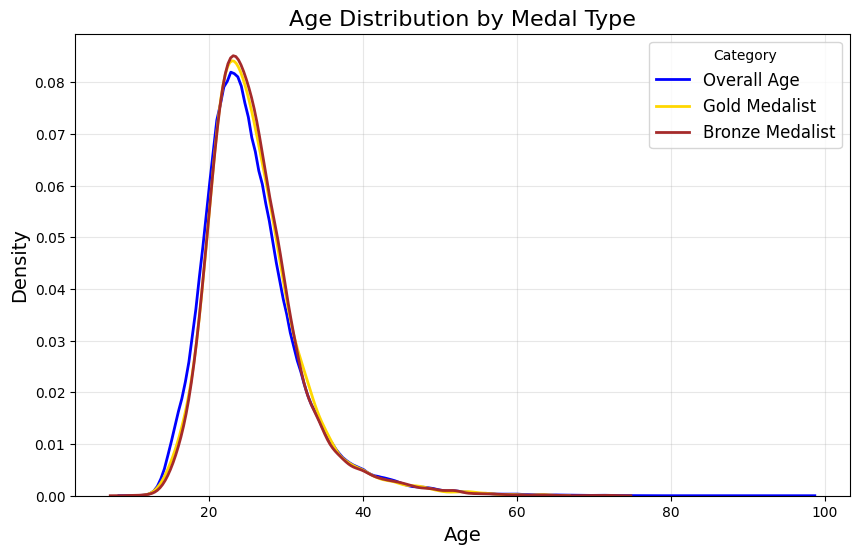

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


# Create labels and colors
data = [x1, x2, x3, x4]
labels = ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist']
colors = ['blue', 'gold', 'silver', 'brown']

# Plot the KDE distribution
plt.figure(figsize=(10, 6))
for i, x in enumerate(data):
    sns.kdeplot(x, label=labels[i], color=colors[i], linewidth=2)

plt.title('Age Distribution by Medal Type', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Category", fontsize=12)
plt.grid(alpha=0.3)

# Streamlit support
st.pyplot_chart(plt)


In [249]:
famous_sport= temp_df['Sport'].unique()
x = []
name = []
for sport in famous_sport:
    temp_df = athlete_df[athlete_df['Sport'== sport]]
    spor=temp_df[temp_df['Medal']=='Gold']['Age'].dropna()
    x.append(spor)
    name.append(sport)

C:\Users\tesla\AppData\Local\Temp\ipykernel_19756\3623326372.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



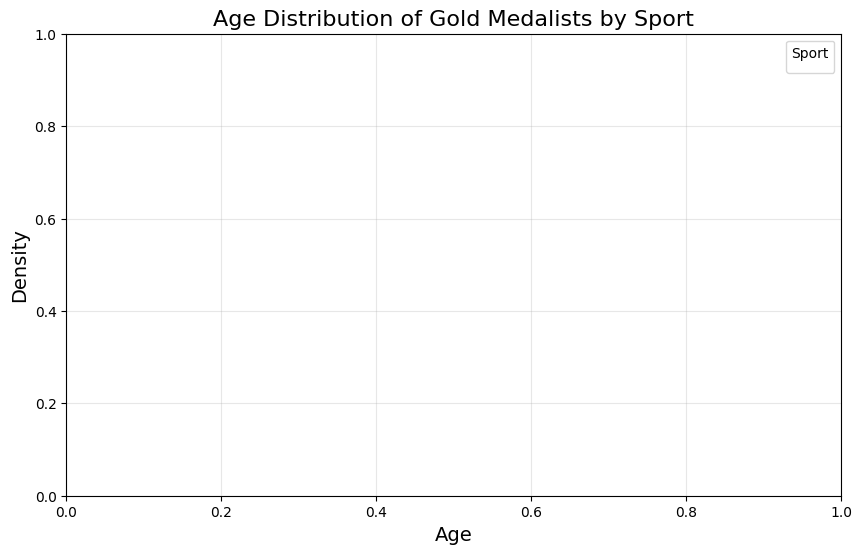

In [ ]:
# Plot data for each sport
plt.figure(figsize=(10, 6))
for sport in famous_sport:
    sport_data = temp_df[(temp_df['Sport'] == sport) & (temp_df['Medal'] == 'Gold')]['Age']
    
    sns.kdeplot(sport_data, label=sport, linewidth=2)

plt.title('Age Distribution of Gold Medalists by Sport', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Sport")
plt.grid(alpha=0.3)
plt.show()
